In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import matplotlib.dates as pltdate
import scipy.io
import json
from scipy import interpolate
from scipy import ndimage
from mpl_toolkits.basemap import Basemap, cm
from datetime import datetime

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [12]:
def ReadReduceTrackData( filename ):
    rt_data = pd.read_csv( filename,header=None,delim_whitespace=True )
    rt_data = rt_data.rename(columns={ 0:"year",1:"month",2:"day",3:"hour",4:"lat",5:"lon",6:"pressure", 7:"windspeed" } )
    rt_data["date"] = pd.to_datetime( rt_data[["year","month","day","hour"]])
    rt_data = rt_data.drop(columns=["year","month","day","hour"] )
    rt_data = rt_data[["date","lat","lon","pressure","windspeed",8]]
    return rt_data

def GetLocation(lon1,lat1, brng, distanceKm):
    lat1 = lat1 * math.pi/ 180.0
    lon1 = lon1 * math.pi / 180.0
    #earth radius
    R = 6378.1
    #R = ~ 3959 MilesR = 3959

    distanceKm = distanceKm/R

    brng = (brng / 90)* math.pi / 2

    lat2 = math.asin(math.sin(lat1) * math.cos(distanceKm) 
    + math.cos(lat1) * math.sin(distanceKm) * math.cos(brng))

    lon2 = lon1 + math.atan2(math.sin(brng)*math.sin(distanceKm)
    * math.cos(lat1),math.cos(distanceKm)-math.sin(lat1)*math.sin(lat2))

    lon2 = 180.0 * lon2/ math.pi
    lat2 = 180.0 * lat2/ math.pi

    return lon2,lat2

def GetJSONFiles(filename):
    jfile = open( filename )
    data = json.load( jfile )

    #Converting String Keys to int
    data = {int(k1): 
       { k2 : 
         { int(k3) : v3 for k3,v3 in v2.items() } 
         for k2,v2 in v1.items() 
        }  
        for k1,v1 in data.items() 
       }
    return data

Considering Example of 2014 | East Pacific Region | Storm number 1

In [13]:
data = GetJSONFiles("..\\files_per_year.json")

In [75]:
year = 14
region = 'EPAC'
storm_no = 1
storm = data[year][region][storm_no]
s_f16 = storm["F16"]
s_f17 = storm["F17"]
s_f18 = storm["F18"]
bestTrack = storm["BestTrack"]
print(bestTrack)

['..\\CurrentData\\SHIPS_Navy_Combined\\raw_data\\14\\EPAC\\1\\', ['EPAC_14_1_Amanda_Reduced_Trackfile.txt', 'EPAC_14_1_Amanda_WWLLN_Locations.txt', 'trackfile.txt']]


In [76]:
bestTrack = storm["BestTrack"]
reduced_track = "..\\" +bestTrack[0] + bestTrack[1][0]    
rt_data = pd.read_csv( reduced_track,header=None,delim_whitespace=True )

filename_16_1 = "..\\" +s_f16[0] + s_f16[1][0]
filename_16_2 = "..\\" +s_f16[0] + s_f16[1][2]
filename_16_3 = "..\\" +s_f16[0] + s_f16[1][3]
filename_16_4 = "..\\" +s_f16[0] + s_f16[1][4]
filename_16_5 = "..\\" +s_f16[0] + s_f16[1][5]

In [77]:
print(filename_16_2)
mat = scipy.io.loadmat(filename_16_2)
rt_data = ReadReduceTrackData(reduced_track)

..\..\CurrentData\Passtimes_and_1C_Data\raw_data\14\EPAC\1\passtimes\SSMIS\F16\20140521T235000_SSMIS_F16.mat


In [78]:
passData = mat["passData"]
val = passData[0,0]

# 2007 06 02 T 004400_SSMIS_F16

freq = val['S3']
freq.shape
filename= s_f16[1][0]
dateForCenter = filename[:15]

In [79]:
print ( freq[0][0][0].shape )
print ( freq[0][0][1].shape )
print ( freq[0][0][2].shape )
print ( freq[0][0][3].shape )

#In the function num2date and num2timedelta date starts with Jan 1, 0001 and not 0000 like matlab
#Thats why -366
serial_date = freq[0][0][0] - 366 
normal_date = np.empty( (serial_date.shape),dtype="datetime64[ns]" )
lat = freq[0][0][1]
lon = freq[0][0][2]
channels = freq[0][0][3]

for i in range(0,len(serial_date)):
    normal_date[i,0] = np.datetime64( pltdate.num2date(serial_date[i,0] ) )

(204, 1)
(180, 204)
(180, 204)
(4, 180, 204)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  from ipykernel import kernelapp as app


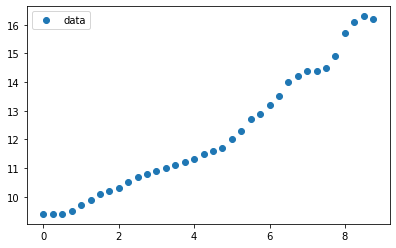

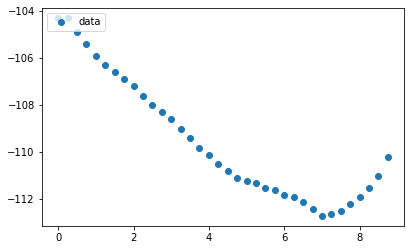

9.253743342507432
-106.18318351696462


In [80]:
xnew = pltdate.datestr2num(dateForCenter) - pltdate.date2num(rt_data["date"][0])
x = pltdate.date2num(rt_data["date"]) - pltdate.date2num(rt_data["date"][0])

ylat = rt_data["lat"]
ylon = rt_data["lon"]

newlat = 0
newlon = 0
if len(x) > 1:
    #Latitude Calculation
    tck = interpolate.CubicSpline(x, ylat)
    newlat = tck(xnew)

    plt.figure(figsize=(6.5, 4))
    plt.plot(x, ylat, 'o', label='data')
    plt.legend(loc='upper left', ncol=2)
    plt.show()
    
    #Longitude Calculation
    tck = interpolate.CubicSpline(x, ylon)
    newlon = tck(xnew)
    plt.figure(figsize=(6.5, 4))
    plt.plot(x, ylon, 'o', label='data')
    #plt.plot(xnew, tck(xnew), label="S", color="red")
    plt.legend(loc='upper left', ncol=2)
    plt.show()
    
    
else:
    newlat = y
print(newlat)
print(newlon)

-106.18318351696462
9.253743342507432


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


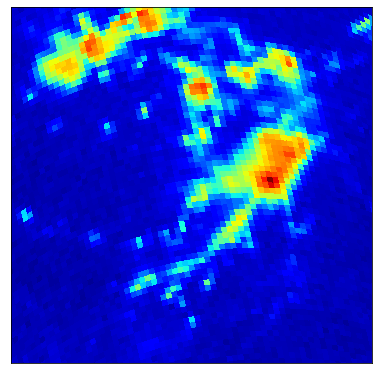

In [91]:
def WorldMap(lon,lat):
    print(lon)
    print(lat)
    # Plot the figure, define the geographic bounds
    # figsize=(4.8,3.0),dpi=72
    fig = plt.figure(figsize=(6.67,5),dpi=72)

    a = math.inf
    b = -math.inf
    c = math.inf
    d = -math.inf
    ls = [ 0,90,180,270 ]
    for i in range(0,4):
        t1,t2= GetLocation(lon, lat,ls[i], 400)
        a = min(t1,a)
        b = max(t1,b)
        c = min(t2,c)
        d = max(t2,d)

    loncorners = ([a,b])
    latcorners = ([c,d])
    m = Basemap(projection='cyl',
                llcrnrlat=latcorners[0],
                urcrnrlat=latcorners[1],
                llcrnrlon=loncorners[0],
                urcrnrlon=loncorners[1])
           
     
    #Draw Parallel lines in the map
    parallels = np.arange(-60.,61,20.)
    m.drawparallels(parallels,labels=[True,False,True,False])

    #Draw Vertical lines in the map
    meridians = np.arange(-180.,180.,60.)
    m.drawmeridians(meridians,labels=[False,False,False,True])

    return fig, m

fig, m = WorldMap(newlon,newlat)

a,b = m(lon,lat)
img = m.pcolormesh(a,b,channels[0], cmap="jet_r",snap =True) 

plt.tight_layout(pad=0)
plt.savefig("apple1",bbox_inches = 'tight', pad_inches = 0)

#To add Color Bar
#fig.colorbar(img)

#
#plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
#img.get_array().reshape(img._meshWidth, img._meshHeight).shape

Code Below Describes Land Check

In [92]:
checklon = np.zeros((721,361))
checklat = np.zeros((721,361))

templon = np.arange(-180.0, 180.5, 0.5)
templat = np.arange(-90.0, 90.5, 0.5)
row = 0
for i in templon:
    col = 0
    for j in templat:
        checklon[row][col] = i
        checklat[row][col] = j
        col+=1
    row+=1
    
mat = scipy.io.loadmat("landcheck.mat")
temp = mat['val']

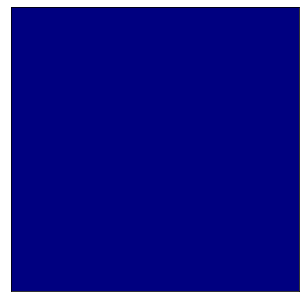

In [93]:
x = m.pcolormesh(checklon,checklat,temp,cmap='jet_r')
plt.tight_layout(pad=0)
plt.savefig("apple2",bbox_inches = 'tight', pad_inches = 0)

In [84]:
import cv2
img_cv2 = cv2.imread("apple2.png")
img_cv2 = cv2.resize(img_cv2, (360, 360))

In [85]:
img_cv1 = cv2.imread("apple1.png") 
img_cv1 = cv2.resize(img_cv1, (360,360))

In [86]:
def ProbabilityOfWhiteSpace(img_cv,cdsf2):
        count = 0
        isOcean = True
        for i in range(img_cv.shape[0]):
            for j in range(img_cv.shape[1]):
                if ( img_cv[i][j][0] == 255 and img_cv[i][j][1] == 255 and img_cv[i][j][2] == 255):
                    count+=1
                elif cdsf2[i][j][0] == 0 and ( cdsf2[i][j][1] > 0 or cdsf2[i][j][2] > 0 ):
                    isOcean = False
        return count / (img_cv.shape[0]*img_cv.shape[1]), isOcean

In [87]:
ProbabilityOfWhiteSpace(img_cv1, img_cv2)

(0.013842592592592592, True)

In [ ]:
for i in range(360):
    for j in range(360):
        if img_cv2[i][j][1] == 0 and 

In [ ]:
for i in range(360):
    for j in range(360):
        if gray1[]

In [ ]:

minLon = np.amin(lon)
maxLon = np.amax(lon)
minLat = np.amin(lat)
maxLat = np.amax(lat)
fig, m = WorldMap(minLon,maxLon,minLat,maxLat)

a,b = m(lon,lat)
plt.pcolormesh(a,b,channels[0], cmap="jet_r")

In [ ]:

templon = np.arange(-180.0, 180.5, 0.5)
templat = np.arange(-90.0, 90.5, 0.5)


In [ ]:
lat.shape

In [ ]:
checklat.shape

In [ ]:

mat

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


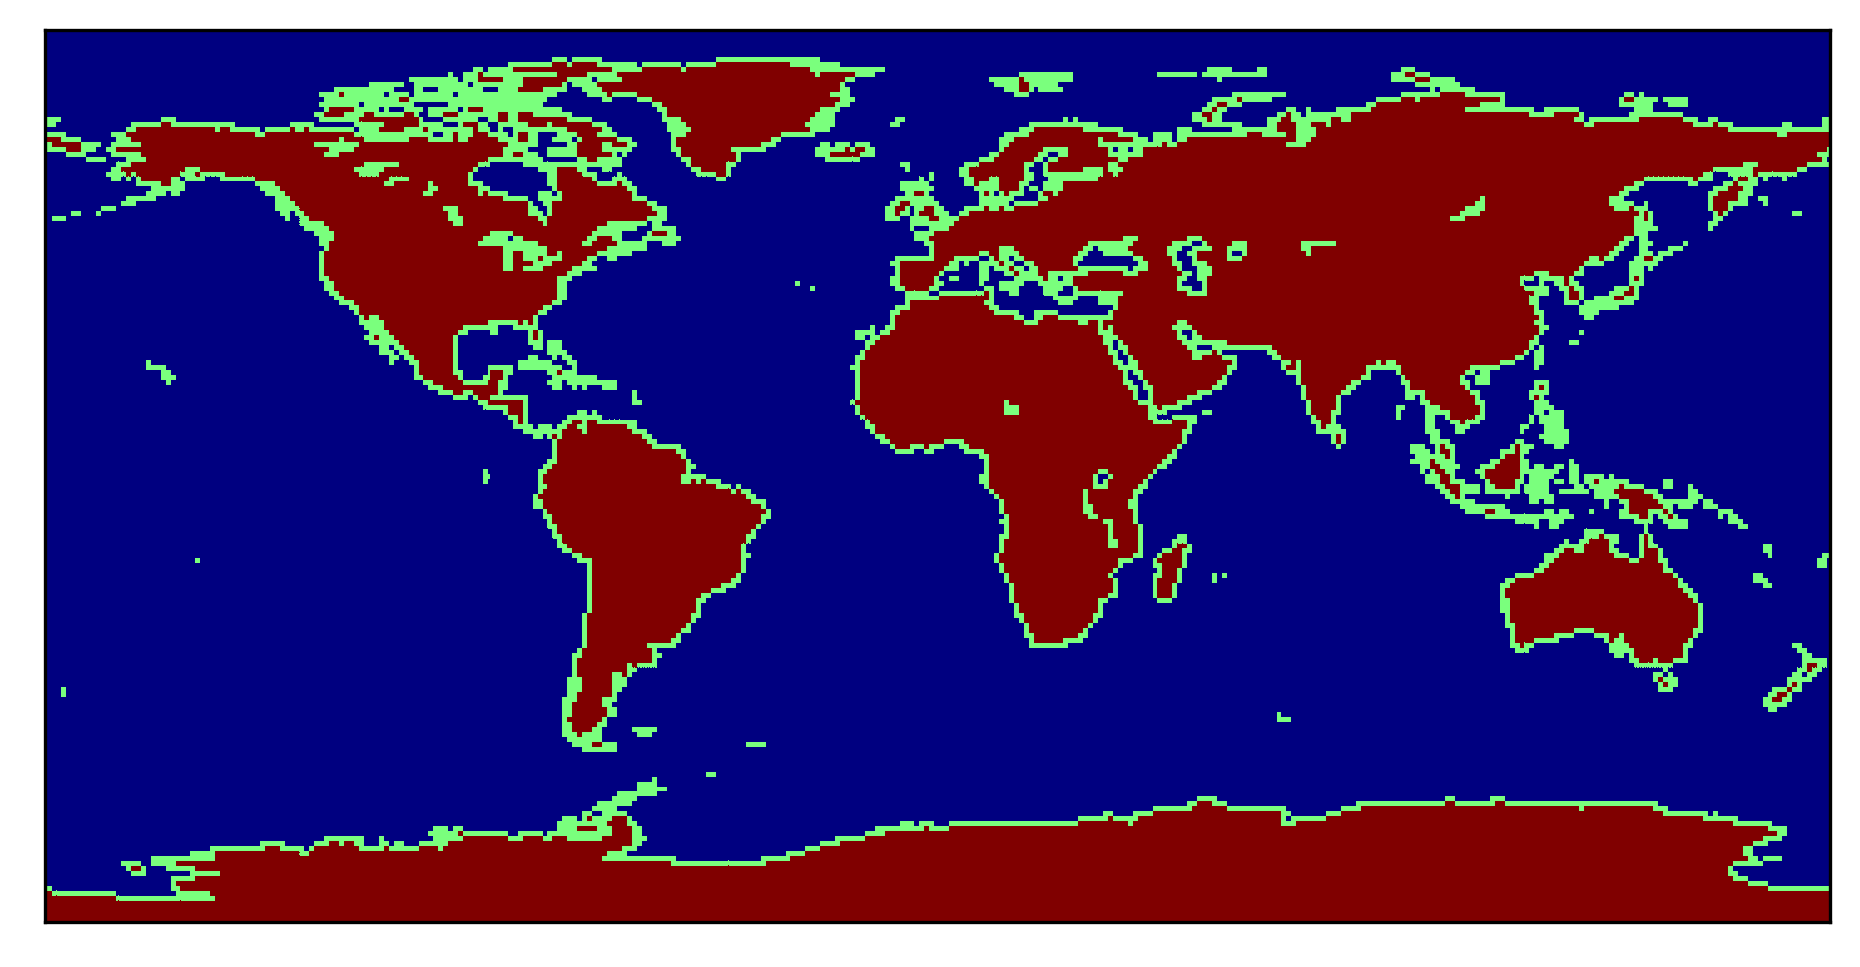

In [45]:
fig = plt.figure(dpi=300)

m = Basemap(projection='cyl',
            llcrnrlat=-90,
            urcrnrlat=90,
            llcrnrlon=-180,
            urcrnrlon=180)
           
    


m.pcolormesh(checklon,checklat,temp,cmap='jet_r')
plt.tight_layout(pad=0)
plt.savefig("land",bbox_inches = 'tight', pad_inches = 0)

In [ ]:
def IsOcean(newlon,newlat):
    arrlon = np.arange(-180.0, 180.5, 0.5)
    arrlat = np.arange(-90.0, 90.5, 0.5)

    currLon = 0
    for tl in arrlon:
        if tl > newlon:
            break
        currLon+=1

    currLat = 0
    for tl in arrlat:
        if tl > newlat:
            break
        currLat+=1
    
    return currLon,currLat
    if currLon != 0 or currLat != 0:
        temp[currLon][currLat] == 2 and temp[currLon - 1][currLat - 1] == 2

In [ ]:
prevLat = 0
currLat = 0
print(newlat)
print(newlon)



prevLon = 0
currLon = 0    
for l in checklon:
    if l[0] > newlon:
        currLon = prevLon
        break
    prevLon+=1
    
print(prevLat,currLat)
print(prevLon,currLon)

In [ ]:

len(checklat.T)

In [ ]:
print( np.where(checklon == prevLon)[0][0] )   
print( np.where(checklat == prevLat)[1][0] )
print( np.where(checklon == currLon)[0][0] )   
print( np.where(checklat == currLat)[1][0] )
print( temp[148][199] )
print( temp[147][198] )

In [ ]:
def floatHourToTime(fh):
    h, r = divmod(fh, 1)
    m, r = divmod(r*60, 1)
    return (
        int(h),
        int(m),
        int(r*60),
    )

def SerialToNormal(excel_date):
    #Converting the date from Jan 1, 0001
    #But it start from Jan 1, 0000
    #So subtracting 1 year from dt.year
    dt = datetime.fromordinal(datetime(1, 1, 1).toordinal() + int(excel_date) - 2)
    hour, minute, second = floatHourToTime(excel_date % 1)
    dt = dt.replace(year = dt.year, hour=hour, minute=minute, second=second)
    return dt

def excel_date(date1):
    temp = datetime(1, 1, 1)    # Note start date, Jan 1, 0001
    delta = date1 - temp
    return float(delta.days)+(float(delta.seconds) / 86400)

In [ ]:
for f_,files in storm.items():
    if f_ == "BestTrack":
        continue
    
    image_dir = "..\\..\\MyCreatedData\\"+str(year)+"\\"+region+"\\"+str(storm_no)+"\\"+f_+"\\"
    for filename in files[1]:
        file_dir = files[0] + filename
        
        time = filename[ 9:15 ]
        
        mat = scipy.io.loadmat(file_dir)
        swaths = mat["passData"][0][0]
        
        i = 1
        for swath_data in swaths:  
            serial_date = swath_data[0][0][0]
            lat = swath_data[0][0][1]
            lon = swath_data[0][0][2]
            channels = swath_data[0][0][3]
            
            lat[lat == -9999.9] = 0
            lon[lon == -9999.9] = 0
           
            minLon = np.amin(lon)
            maxLon = np.amax(lon)
            minLat = np.amin(lat)
            maxLat = np.amax(lat)
            
            fig, m = WorldMap(minLon,maxLon,minLat,maxLat)
            a,b = m(lon,lat)

            j = 0
            for freq in channels:
                image_file_dir = image_dir + "S" + str(i) + "\\" + swath_map[i][j] + "\\" + filename[ : len(filename) - 4]
                plt.pcolormesh(a,b,freq, cmap="jet_r")
                plt.savefig( image_file_dir )
                j+=1
            i+=1